In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from datetime import datetime, date

import importlib
import Projet5_utils as utils
importlib.reload(utils)

<module 'Projet5_utils' from 'C:\\Users\\Florian\\Projet5_utils.py'>

# Read data

In [2]:
PATH = "E:/OpenClassrooms/Projet5/Datasets"


df_customers = pd.read_csv(os.path.join(PATH, "olist_customers_dataset.csv"))
df_items = pd.read_csv(os.path.join(PATH, "olist_order_items_dataset.csv"))
df_payments = pd.read_csv(os.path.join(PATH, "olist_order_payments_dataset.csv"))
df_reviews = pd.read_csv(os.path.join(PATH, "olist_order_reviews_dataset.csv"))
df_orders = pd.read_csv(os.path.join(PATH, "olist_orders_dataset.csv"))
df_products = pd.read_csv(os.path.join(PATH, "olist_products_dataset.csv"))

In [3]:
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


## Engineering df_orders

In [4]:
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


#### Drop non delivered orders

In [5]:
df_orders = df_orders.drop(df_orders.loc[df_orders['order_status']!='delivered'].index, axis=0)

#### Convert date of purchase to number of days before a reference, reference = date of the last purchase

In [6]:
date_format = '%Y-%m-%d %H:%M:%S'
d0_format = datetime.strptime(df_orders['order_purchase_timestamp'].max(), date_format)
d0 = date(d0_format.year, d0_format.month, d0_format.day)
list_days = []

for i in df_orders['order_purchase_timestamp']:
    d_format = datetime.strptime(i, date_format)
    d = date(d_format.year, d_format.month, d_format.day)
    delta = d0 - d
    list_days.append(delta.days)
    
df_orders = df_orders.assign(days_ago=list_days)

#### Delete irrelevant variables

In [7]:
orders_relevant_features = ['order_id', 'customer_id', 'days_ago']
df_orders = df_orders[orders_relevant_features]

In [8]:
df_orders

,order_id,customer_id,days_ago
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,331
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,36
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,21
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,284
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,197
...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,538
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,204
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,367
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,233


## Merge orders and customers
#### There are 2 ids available: 
#### - customer_unique_id = customer identifier
#### - customer_id = id of of the customer for 1 specific command. 
#### If the customer ordered several times, he will have several different customer_id (one for each order, ie one different for every row they appear in), but only 1 customer_unique_id (the same for every orders)

In [9]:
df1 = pd.merge(df_customers, df_orders, on='customer_id', how='right')

In [10]:
df1

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,days_ago
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,331
1,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,53cdb2fc8bc7dce0b6741e2150273451,36
2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,47770eb9100c2d0c44946d9cf07ec65d,21
3,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,949d5b44dbf5de918fe9c16f97b45f8a,284
4,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,ad21c59c0840e6cb83a9ceb5573f8159,197
...,...,...,...,...,...,...,...
96473,39bd1228ee8140590ac3aca26f2dfe00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,9c5dedf39a927c1b2549525ed64a053c,538
96474,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,63943bddc261676b46f01ca7ac2f7bd8,204
96475,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,83c1379a015df1e13d02aae0204711ab,367
96476,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,11c177c8e97725db2631073c19f07b62,233


In [11]:
len(df1['customer_unique_id'].unique())

93358

In [12]:
df1.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
order_id                    0
days_ago                    0
dtype: int64

## Engineering df1

In [13]:
# number of orders per customer
orders_count = df1['order_id'].groupby(df1['customer_unique_id']).transform('count')
df1 = df1.assign(number_of_orders=orders_count)

In [14]:
df1

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,days_ago,number_of_orders
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,331,2
1,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,53cdb2fc8bc7dce0b6741e2150273451,36,1
2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,47770eb9100c2d0c44946d9cf07ec65d,21,1
3,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,949d5b44dbf5de918fe9c16f97b45f8a,284,1
4,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,ad21c59c0840e6cb83a9ceb5573f8159,197,1
...,...,...,...,...,...,...,...,...
96473,39bd1228ee8140590ac3aca26f2dfe00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,9c5dedf39a927c1b2549525ed64a053c,538,1
96474,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,63943bddc261676b46f01ca7ac2f7bd8,204,1
96475,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,83c1379a015df1e13d02aae0204711ab,367,1
96476,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,11c177c8e97725db2631073c19f07b62,233,1


In [15]:
len(df1['customer_unique_id'].unique())

93358

### Reviews

In [16]:
df_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


#### There are sometimes several reviews for the same order with different scores, ie edited reviews. The relevant one is the latest, therefore we delete all duplicates and keep the latest

In [17]:
df_reviews.loc[df_reviews.duplicated(subset=['order_id'])==True]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1119,46abf3ea0b2710ad41390fdb79c32d84,5040757d4e06a4be96d3827b860b4e7c,5,NaN,NaN,2017-11-07 00:00:00,2017-11-10 20:07:48
3109,aa193e76d35950c4ae988237bb36ed2b,cf73e2cb1f4a9480ed70c154da3d954a,5,NaN,NaN,2018-01-18 00:00:00,2018-01-18 17:36:45
8108,40294ea5a778dc62080d6b3f55d361ce,e1bc1083cd7acd30d0576335373b907d,5,NaN,NaN,2018-03-23 00:00:00,2018-03-24 00:23:06
9064,32e2c7e889f7a185d462265398ee3631,c7cfea0c153e6382e32e84c2a9dd7d2e,5,NaN,NaN,2017-10-21 00:00:00,2017-10-22 00:47:25
9795,95a3135743556b117d888cc8c6e12e11,f9c78e6e58306dc81efbbada1ac11f24,3,NaN,O produto chegou antes do prazo mas recebi um ...,2017-09-14 00:00:00,2017-09-17 11:14:08
...,...,...,...,...,...,...,...
98989,dfb3db02188d809d5cd199496b6da87e,c0db7d31ace61fc360a3eaa34dd3457c,5,NaN,NaN,2018-02-17 00:00:00,2018-02-19 19:29:19
99108,2c6c08892b83ba4c1be33037c2842294,42ae1967f68c90bb325783ac55d761ce,4,NaN,"Chegou um pouco amassada, mas nada de mais, e ...",2017-07-03 00:00:00,2017-07-05 19:06:59
99164,2afe63a67dfd99b3038f568fb47ee761,c5334d330e36d2a810a7a13c72e135ee,5,NaN,"Muito bom, produto conforme anunciado, entrega...",2018-03-03 00:00:00,2018-03-04 22:56:47
99178,44d1e9165ec54b1d89d33594856af859,a7dbcf5043158d6fa72859eead2f3d10,4,NaN,NaN,2017-05-24 00:00:00,2017-05-24 23:15:21


In [18]:
df_reviews.loc[df_reviews['order_id']=='e1bc1083cd7acd30d0576335373b907d']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
4465,6a6b09101cc2614a5d398230256420bc,e1bc1083cd7acd30d0576335373b907d,4,NaN,Falta receber um jogo de cama de solteiro. Com...,2018-03-23 00:00:00,2018-03-23 23:04:41
8108,40294ea5a778dc62080d6b3f55d361ce,e1bc1083cd7acd30d0576335373b907d,5,NaN,NaN,2018-03-23 00:00:00,2018-03-24 00:23:06


In [19]:
df_reviews = df_reviews.drop_duplicates(subset=['order_id'], keep='last')

In [20]:
df_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [21]:
reviews_relevant_features = ['order_id', 'review_score']
df_reviews = df_reviews[reviews_relevant_features]

### Merge with df_reviews and engineering

In [22]:
df2 = pd.merge(df1, df_reviews, on='order_id', how='left')

In [23]:
df2

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,days_ago,number_of_orders,review_score
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,331,2,4.0
1,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,53cdb2fc8bc7dce0b6741e2150273451,36,1,4.0
2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,47770eb9100c2d0c44946d9cf07ec65d,21,1,5.0
3,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,949d5b44dbf5de918fe9c16f97b45f8a,284,1,5.0
4,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,ad21c59c0840e6cb83a9ceb5573f8159,197,1,5.0
...,...,...,...,...,...,...,...,...,...
96473,39bd1228ee8140590ac3aca26f2dfe00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,9c5dedf39a927c1b2549525ed64a053c,538,1,5.0
96474,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,63943bddc261676b46f01ca7ac2f7bd8,204,1,4.0
96475,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,83c1379a015df1e13d02aae0204711ab,367,1,5.0
96476,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,11c177c8e97725db2631073c19f07b62,233,1,2.0


In [24]:
len(df2['customer_unique_id'].unique())

93358

In [25]:
# average review score
average_review = df2.groupby('customer_unique_id').review_score.agg(average_review_score = 'mean')
df2 = pd.merge(df2, average_review, on='customer_unique_id')

In [26]:
df2

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,days_ago,number_of_orders,review_score,average_review_score
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,331,2,4.0,4.5
1,31f31efcb333fcbad2b1371c8cf0fa84,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,69923a4e07ce446644394df37a710286,359,2,5.0,4.5
2,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,53cdb2fc8bc7dce0b6741e2150273451,36,1,4.0,4.0
3,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,47770eb9100c2d0c44946d9cf07ec65d,21,1,5.0,5.0
4,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,949d5b44dbf5de918fe9c16f97b45f8a,284,1,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...
96473,39bd1228ee8140590ac3aca26f2dfe00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,9c5dedf39a927c1b2549525ed64a053c,538,1,5.0,5.0
96474,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,63943bddc261676b46f01ca7ac2f7bd8,204,1,4.0,4.0
96475,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,83c1379a015df1e13d02aae0204711ab,367,1,5.0,5.0
96476,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,11c177c8e97725db2631073c19f07b62,233,1,2.0,2.0


In [27]:
len(df2['customer_unique_id'].unique())

93358

### Items per order and products

In [28]:
df_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [29]:
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


#### Check if there are 'duplicated' product categories (for instance same category in 2 different languages)

In [30]:
df_products['product_category_name'].unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', nan,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
   

#### add the product category in df_items

In [31]:
df_products = df_products[['product_id', 'product_category_name']]

In [32]:
df_items = pd.merge(df_items, df_products, on='product_id', how='left')

In [33]:
df_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios


In [34]:
# Delete irrelevant variables
items_relevant_features = ['order_id', 'price', 'product_category_name']
df_items = df_items[items_relevant_features]

In [35]:
df_items

,order_id,price,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,239.90,pet_shop
2,000229ec398224ef6ca0657da4fc703e,199.00,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,12.99,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,ferramentas_jardim
...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,299.99,utilidades_domesticas
112646,fffcd46ef2263f404302a634eb57f7eb,350.00,informatica_acessorios
112647,fffce4705a9662cd70adb13d4a31832d,99.90,esporte_lazer
112648,fffe18544ffabc95dfada21779c9644f,55.99,informatica_acessorios


### Engineering

In [36]:
# Average price of the products per order (if several products bought)
average_price = df_items.groupby('order_id').price.agg(average_price='mean')
df_items = pd.merge(df_items, average_price, on='order_id')

In [37]:
# Total price of the order
total_price = df_items.groupby('order_id').price.agg(total_price='sum')
df_items = pd.merge(df_items, total_price, on='order_id')

In [38]:
# Number of items bought
items_count = df_items['order_id'].groupby(df_items['order_id']).transform('count')
df_items = df_items.assign(number_of_items=items_count)

In [39]:
df_items

,order_id,price,product_category_name,average_price,total_price,number_of_items
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,cool_stuff,58.90,58.90,1
1,00018f77f2f0320c557190d7a144bdd3,239.90,pet_shop,239.90,239.90,1
2,000229ec398224ef6ca0657da4fc703e,199.00,moveis_decoracao,199.00,199.00,1
3,00024acbcdf0a6daa1e931b038114c75,12.99,perfumaria,12.99,12.99,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,ferramentas_jardim,199.90,199.90,1
...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,299.99,utilidades_domesticas,299.99,299.99,1
112646,fffcd46ef2263f404302a634eb57f7eb,350.00,informatica_acessorios,350.00,350.00,1
112647,fffce4705a9662cd70adb13d4a31832d,99.90,esporte_lazer,99.90,99.90,1
112648,fffe18544ffabc95dfada21779c9644f,55.99,informatica_acessorios,55.99,55.99,1


In [40]:
df_items.loc[df_items['number_of_items']!=1]

,order_id,price,product_category_name,average_price,total_price,number_of_items
13,0008288aa423d2a3f00fcb17cd7d8719,49.90,ferramentas_jardim,49.90,99.80,2
14,0008288aa423d2a3f00fcb17cd7d8719,49.90,ferramentas_jardim,49.90,99.80,2
32,00143d0f86d6fbd9f9b38ab440ac16f5,21.33,esporte_lazer,21.33,63.99,3
33,00143d0f86d6fbd9f9b38ab440ac16f5,21.33,esporte_lazer,21.33,63.99,3
34,00143d0f86d6fbd9f9b38ab440ac16f5,21.33,esporte_lazer,21.33,63.99,3
...,...,...,...,...,...,...
112635,fff8287bbae429a99bb7e8c21d151c41,180.00,informatica_acessorios,180.00,360.00,2
112640,fffb9224b6fc7c43ebb0904318b10b5f,55.00,relogios_presentes,55.00,220.00,4
112641,fffb9224b6fc7c43ebb0904318b10b5f,55.00,relogios_presentes,55.00,220.00,4
112642,fffb9224b6fc7c43ebb0904318b10b5f,55.00,relogios_presentes,55.00,220.00,4


### Set all categories where the count of products is too small to 'Other'
#### There are many categories where the count is very small compared to other categories. In the distribution, there is an elbow around 500. By setting all categories where the count is <500, we can delete more than half of the categories, and replace them by a single one in a similar magnitude as the other categories. We also reduce the dimension of the problem by this same amount

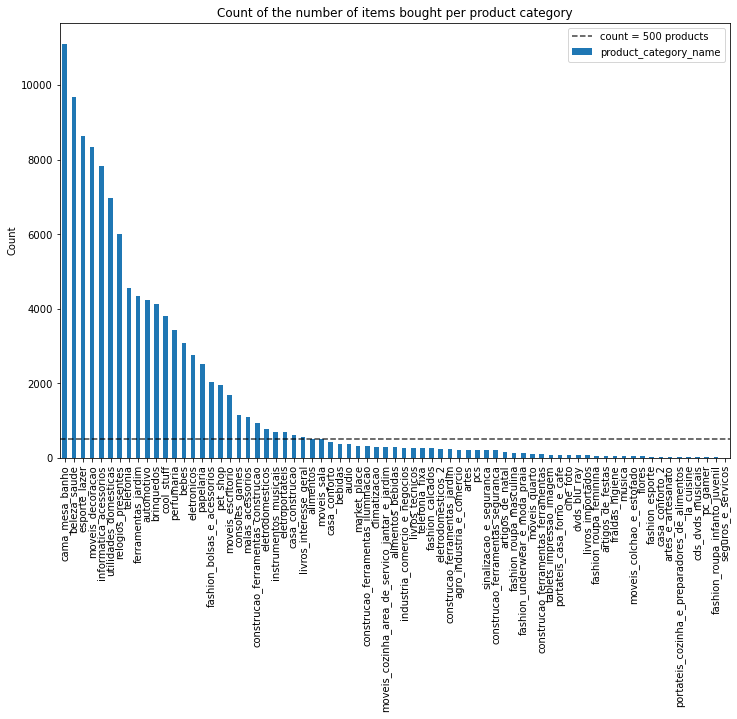

In [41]:
df_items['product_category_name'].value_counts(normalize=False).plot(kind='bar', figsize=(12, 8))
plt.axhline(y=500, ls='--', c='k', alpha=.75, label='count = 500 products')

plt.ylabel('Count')
plt.title('Count of the number of items bought per product category')
plt.legend()
plt.show()

In [42]:
L = []
for i in df_items['product_category_name'].unique():
    if (df_items['product_category_name']==i).sum() <= 500:
        L.append(i)
        
df_items.loc[df_items['product_category_name'].isin(L), 'product_category_name'] = 'Other'

### OneHotEncoding on product category

In [43]:
y = pd.get_dummies(df_items.product_category_name, prefix='Cat')

In [44]:
df_items = pd.concat([df_items, y], axis=1)

In [45]:
df_items

,order_id,price,product_category_name,average_price,total_price,number_of_items,Cat_Other,Cat_alimentos,Cat_automotivo,Cat_bebes,...,Cat_malas_acessorios,Cat_moveis_decoracao,Cat_moveis_escritorio,Cat_moveis_sala,Cat_papelaria,Cat_perfumaria,Cat_pet_shop,Cat_relogios_presentes,Cat_telefonia,Cat_utilidades_domesticas
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,cool_stuff,58.90,58.90,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00018f77f2f0320c557190d7a144bdd3,239.90,pet_shop,239.90,239.90,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,000229ec398224ef6ca0657da4fc703e,199.00,moveis_decoracao,199.00,199.00,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,00024acbcdf0a6daa1e931b038114c75,12.99,perfumaria,12.99,12.99,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,ferramentas_jardim,199.90,199.90,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,299.99,utilidades_domesticas,299.99,299.99,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
112646,fffcd46ef2263f404302a634eb57f7eb,350.00,informatica_acessorios,350.00,350.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112647,fffce4705a9662cd70adb13d4a31832d,99.90,esporte_lazer,99.90,99.90,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112648,fffe18544ffabc95dfada21779c9644f,55.99,informatica_acessorios,55.99,55.99,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


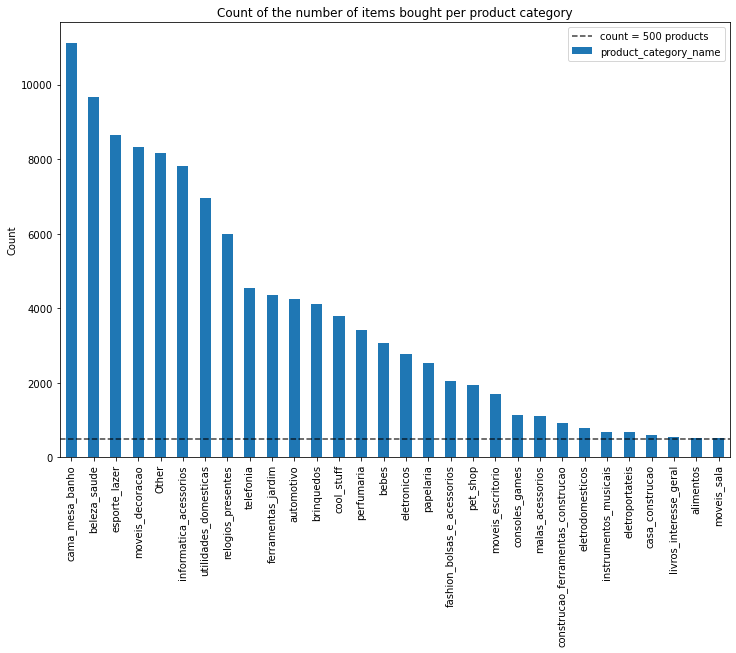

In [46]:
df_items['product_category_name'].value_counts(normalize=False).plot(kind='bar', figsize=(12, 8))
plt.axhline(y=500, ls='--', c='k', alpha=.75, label='count = 500 products')

plt.ylabel('Count')
plt.title('Count of the number of items bought per product category')
plt.legend()
plt.show()

### Merge

In [47]:
len(df2['customer_unique_id'].unique())

93358

In [48]:
len(df2['order_id'].unique())

96478

In [49]:
df3 = pd.merge(df2, df_items, on='order_id', how='left')

In [50]:
df3

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,days_ago,number_of_orders,review_score,average_review_score,...,Cat_malas_acessorios,Cat_moveis_decoracao,Cat_moveis_escritorio,Cat_moveis_sala,Cat_papelaria,Cat_perfumaria,Cat_pet_shop,Cat_relogios_presentes,Cat_telefonia,Cat_utilidades_domesticas
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,331,2,4.0,4.5,...,0,0,0,0,0,0,0,0,0,1
1,31f31efcb333fcbad2b1371c8cf0fa84,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,69923a4e07ce446644394df37a710286,359,2,5.0,4.5,...,0,0,0,0,0,0,0,0,0,0
2,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,53cdb2fc8bc7dce0b6741e2150273451,36,1,4.0,4.0,...,0,0,0,0,0,1,0,0,0,0
3,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,47770eb9100c2d0c44946d9cf07ec65d,21,1,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
4,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,949d5b44dbf5de918fe9c16f97b45f8a,284,1,5.0,5.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110192,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,63943bddc261676b46f01ca7ac2f7bd8,204,1,4.0,4.0,...,0,0,0,0,0,0,0,0,0,0
110193,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,83c1379a015df1e13d02aae0204711ab,367,1,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
110194,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,11c177c8e97725db2631073c19f07b62,233,1,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
110195,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,11c177c8e97725db2631073c19f07b62,233,1,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
len(df3['customer_unique_id'].unique())

93358

In [52]:
df3.isnull().sum()

customer_id                                0
customer_unique_id                         0
customer_zip_code_prefix                   0
customer_city                              0
customer_state                             0
order_id                                   0
days_ago                                   0
number_of_orders                           0
review_score                             827
average_review_score                     781
price                                      0
product_category_name                      0
average_price                              0
total_price                                0
number_of_items                            0
Cat_Other                                  0
Cat_alimentos                              0
Cat_automotivo                             0
Cat_bebes                                  0
Cat_beleza_saude                           0
Cat_brinquedos                             0
Cat_cama_mesa_banho                        0
Cat_casa_c

### Payments

In [53]:
len(df_payments['order_id'].unique())

99440

In [54]:
# Most frequent payment type used, when order paid via with different types (eg credit card + voucher)

main_payment_type = df_payments.groupby('order_id').payment_type.agg(main_payment_type=lambda x: pd.Series.mode(x)[0])
df_payments = pd.merge(df_payments, main_payment_type, on='order_id')

In [55]:
df_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value,main_payment_type
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,credit_card
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,credit_card
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,credit_card
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,credit_card
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,credit_card
...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,boleto
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,credit_card
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,credit_card
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,credit_card


In [56]:
# Delete irrelevant variables
payments_relevant_features = ['order_id', 'main_payment_type']
df_payments = df_payments[payments_relevant_features]

In [57]:
df_payments

,order_id,main_payment_type
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card
3,ba78997921bbcdc1373bb41e913ab953,credit_card
4,42fdf880ba16b47b59251dd489d4441a,credit_card
...,...,...
103881,0406037ad97740d563a178ecc7a2075c,boleto
103882,7b905861d7c825891d6347454ea7863f,credit_card
103883,32609bbb3dd69b3c066a6860554a77bf,credit_card
103884,b8b61059626efa996a60be9bb9320e10,credit_card


#### For each order, there are several rows, each row corresponding to a payment installment (only 1 line if paid at a single time). We only need 1 of them

In [58]:
df_payments = df_payments.drop_duplicates(subset=['order_id'], keep='first')

In [59]:
df_payments

,order_id,main_payment_type
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card
3,ba78997921bbcdc1373bb41e913ab953,credit_card
4,42fdf880ba16b47b59251dd489d4441a,credit_card
...,...,...
103881,0406037ad97740d563a178ecc7a2075c,boleto
103882,7b905861d7c825891d6347454ea7863f,credit_card
103883,32609bbb3dd69b3c066a6860554a77bf,credit_card
103884,b8b61059626efa996a60be9bb9320e10,credit_card


## Merge into df4

In [60]:
df4 = pd.merge(df3, df_payments, on='order_id', how='left')

In [61]:
df4

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,days_ago,number_of_orders,review_score,average_review_score,...,Cat_moveis_decoracao,Cat_moveis_escritorio,Cat_moveis_sala,Cat_papelaria,Cat_perfumaria,Cat_pet_shop,Cat_relogios_presentes,Cat_telefonia,Cat_utilidades_domesticas,main_payment_type
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,331,2,4.0,4.5,...,0,0,0,0,0,0,0,0,1,voucher
1,31f31efcb333fcbad2b1371c8cf0fa84,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,69923a4e07ce446644394df37a710286,359,2,5.0,4.5,...,0,0,0,0,0,0,0,0,0,credit_card
2,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,53cdb2fc8bc7dce0b6741e2150273451,36,1,4.0,4.0,...,0,0,0,0,1,0,0,0,0,boleto
3,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,47770eb9100c2d0c44946d9cf07ec65d,21,1,5.0,5.0,...,0,0,0,0,0,0,0,0,0,credit_card
4,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,949d5b44dbf5de918fe9c16f97b45f8a,284,1,5.0,5.0,...,0,0,0,0,0,1,0,0,0,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110192,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,63943bddc261676b46f01ca7ac2f7bd8,204,1,4.0,4.0,...,0,0,0,0,0,0,0,0,0,credit_card
110193,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,83c1379a015df1e13d02aae0204711ab,367,1,5.0,5.0,...,0,0,0,0,0,0,0,0,0,credit_card
110194,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,11c177c8e97725db2631073c19f07b62,233,1,2.0,2.0,...,0,0,0,0,0,0,0,0,0,credit_card
110195,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,11c177c8e97725db2631073c19f07b62,233,1,2.0,2.0,...,0,0,0,0,0,0,0,0,0,credit_card


In [62]:
len(df4['customer_unique_id'].unique())

93358

In [63]:
len(df4['order_id'].unique())

96478

## Engineering
#### For each order, we have one row per product. We combine here all the products into 1 single row per order using the OHE

In [64]:
list_cat = [i for i in df4.columns if 'Cat_' in i]  #Get list of columns corresponding to a category

# We compute here the sum of products in each category per order and add a new column to the df containing the number of items

for i in list_cat:
    df4_new = df4.groupby('order_id').agg({i:'sum'})
    df4 = df4.drop(i, axis=1)
    df4 = pd.merge(df4, df4_new, on='order_id', how='left')

In [65]:
len(df4['customer_unique_id'].unique())

93358

In [66]:
df4['number_of_items'].unique()

array([ 1,  2,  4,  5,  3,  6,  8,  7, 12, 11,  9, 14, 10, 15, 13, 20, 21],
      dtype=int64)

In [67]:
df4.columns.to_list()

['customer_id',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'order_id',
 'days_ago',
 'number_of_orders',
 'review_score',
 'average_review_score',
 'price',
 'product_category_name',
 'average_price',
 'total_price',
 'number_of_items',
 'main_payment_type',
 'Cat_Other',
 'Cat_alimentos',
 'Cat_automotivo',
 'Cat_bebes',
 'Cat_beleza_saude',
 'Cat_brinquedos',
 'Cat_cama_mesa_banho',
 'Cat_casa_construcao',
 'Cat_consoles_games',
 'Cat_construcao_ferramentas_construcao',
 'Cat_cool_stuff',
 'Cat_eletrodomesticos',
 'Cat_eletronicos',
 'Cat_eletroportateis',
 'Cat_esporte_lazer',
 'Cat_fashion_bolsas_e_acessorios',
 'Cat_ferramentas_jardim',
 'Cat_informatica_acessorios',
 'Cat_instrumentos_musicais',
 'Cat_livros_interesse_geral',
 'Cat_malas_acessorios',
 'Cat_moveis_decoracao',
 'Cat_moveis_escritorio',
 'Cat_moveis_sala',
 'Cat_papelaria',
 'Cat_perfumaria',
 'Cat_pet_shop',
 'Cat_relogios_presentes',
 'Cat_telefonia',
 'Cat_utilidades

In [68]:
df4 = df4.drop_duplicates(subset=['order_id'], keep='first')

In [69]:
df4

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,days_ago,number_of_orders,review_score,average_review_score,...,Cat_malas_acessorios,Cat_moveis_decoracao,Cat_moveis_escritorio,Cat_moveis_sala,Cat_papelaria,Cat_perfumaria,Cat_pet_shop,Cat_relogios_presentes,Cat_telefonia,Cat_utilidades_domesticas
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,331,2,4.0,4.5,...,0,0,0,0,0,0,0,0,0,1
1,31f31efcb333fcbad2b1371c8cf0fa84,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,69923a4e07ce446644394df37a710286,359,2,5.0,4.5,...,0,0,0,0,0,0,0,0,0,0
2,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,53cdb2fc8bc7dce0b6741e2150273451,36,1,4.0,4.0,...,0,0,0,0,0,1,0,0,0,0
3,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,47770eb9100c2d0c44946d9cf07ec65d,21,1,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
4,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,949d5b44dbf5de918fe9c16f97b45f8a,284,1,5.0,5.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110191,39bd1228ee8140590ac3aca26f2dfe00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,9c5dedf39a927c1b2549525ed64a053c,538,1,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
110192,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,63943bddc261676b46f01ca7ac2f7bd8,204,1,4.0,4.0,...,0,0,0,0,0,0,0,0,0,0
110193,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,83c1379a015df1e13d02aae0204711ab,367,1,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
110194,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,11c177c8e97725db2631073c19f07b62,233,1,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df4.isnull().sum()

customer_id                                0
customer_unique_id                         0
customer_zip_code_prefix                   0
customer_city                              0
customer_state                             0
order_id                                   0
days_ago                                   0
number_of_orders                           0
review_score                             646
average_review_score                     612
price                                      0
product_category_name                      0
average_price                              0
total_price                                0
number_of_items                            0
main_payment_type                          1
Cat_Other                                  0
Cat_alimentos                              0
Cat_automotivo                             0
Cat_bebes                                  0
Cat_beleza_saude                           0
Cat_brinquedos                             0
Cat_cama_m

In [71]:
df4.to_csv(os.path.join(PATH, "cleaned_df.csv"), index=False)

# Exploration

In [72]:
df = pd.read_csv(os.path.join(PATH, "cleaned_df.csv"), low_memory=False)

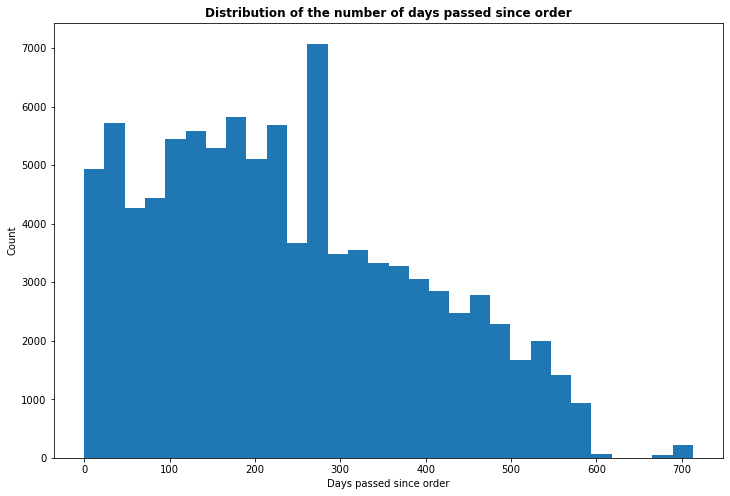

In [73]:
fig = plt.figure(figsize=(12, 8))
plt.hist(df['days_ago'], 30)

plt.title('Distribution of the number of days passed since order', fontsize=12, fontweight='semibold')
plt.xlabel('Days passed since order')
plt.ylabel('Count')
plt.show()

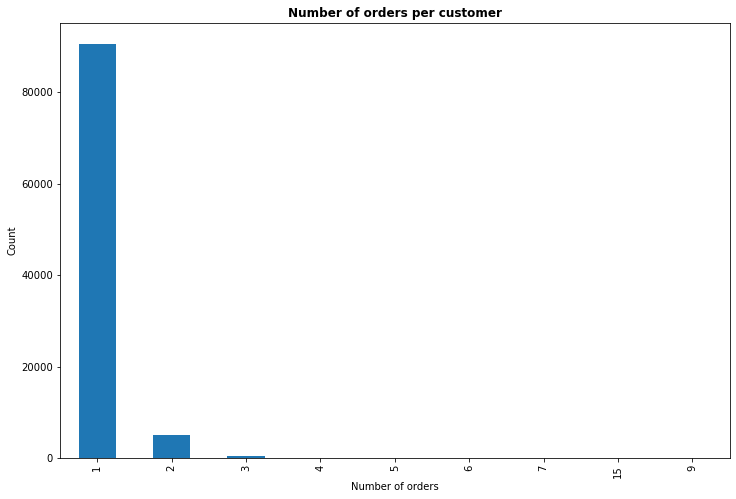

In [74]:
df['number_of_orders'].value_counts(normalize=False).plot(kind='bar', figsize=(12, 8))

plt.ylabel('Count')
plt.xlabel('Number of orders')
plt.title('Number of orders per customer', fontsize=12, fontweight='semibold')
plt.show()

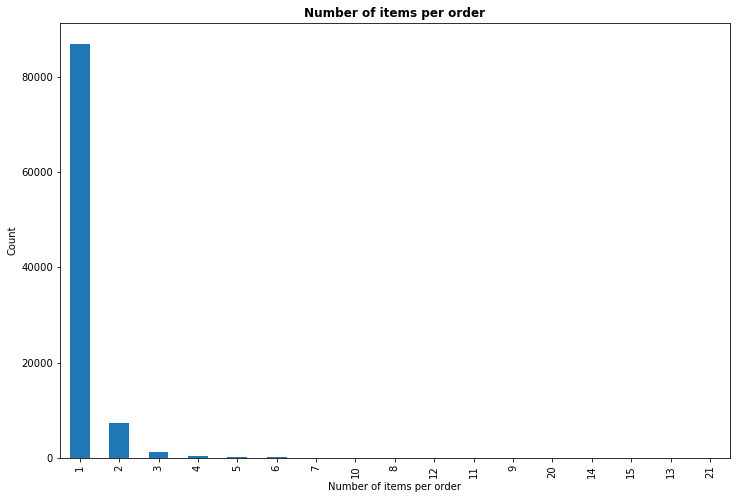

In [75]:
df['number_of_items'].value_counts(normalize=False).plot(kind='bar', figsize=(12, 8))

plt.ylabel('Count')
plt.xlabel('Number of items per order')
plt.title('Number of items per order', fontsize=12, fontweight='semibold')
plt.show()

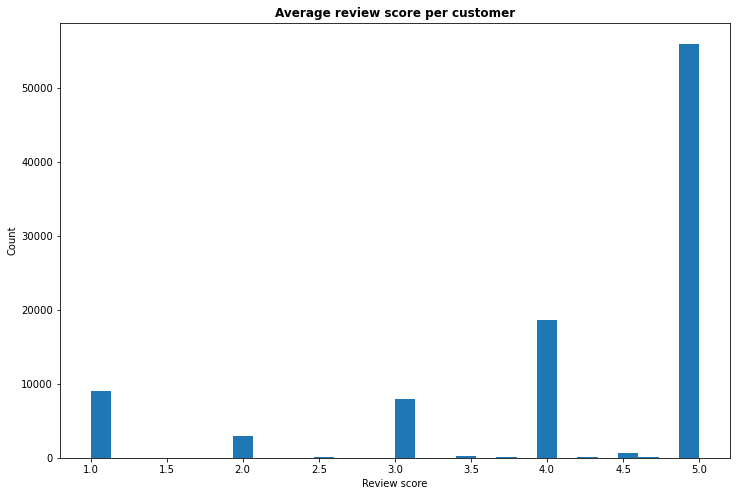

In [76]:
fig = plt.figure(figsize=(12, 8))
plt.hist(df['average_review_score'], 30)

plt.title('Average review score per customer', fontsize=12, fontweight='semibold')
plt.xlabel('Review score')
plt.ylabel('Count')
plt.show()

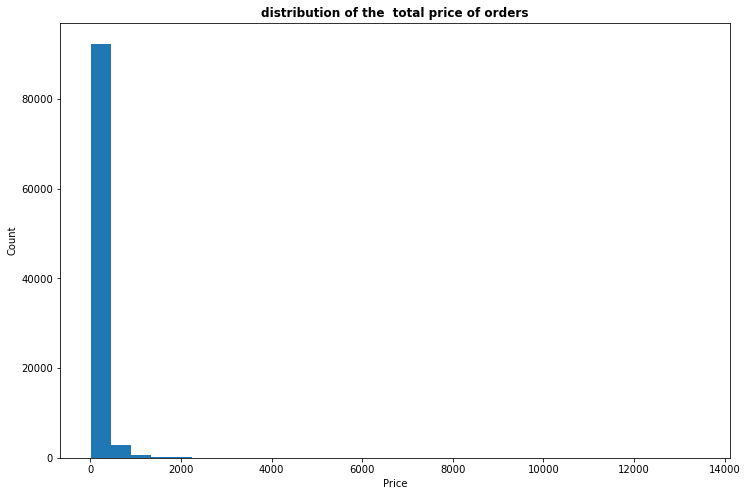

In [77]:
fig = plt.figure(figsize=(12, 8))
plt.hist(df['total_price'], 30)

plt.title('distribution of the  total price of orders', fontsize=12, fontweight='semibold')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

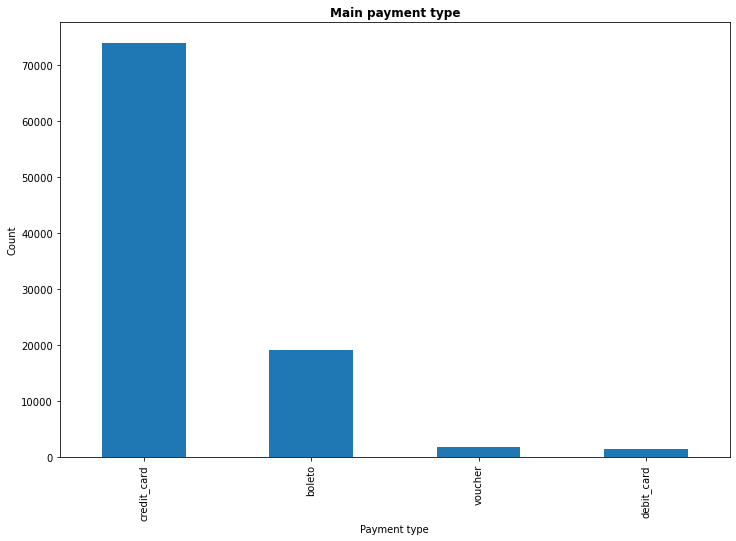

In [78]:
df['main_payment_type'].value_counts(normalize=False).plot(kind='bar', figsize=(12, 8))

plt.ylabel('Count')
plt.xlabel('Payment type')
plt.title('Main payment type', fontsize=12, fontweight='semibold')
plt.show()

### Correlations
#### Several features are heavily correlated, we can delete them

<AxesSubplot:>

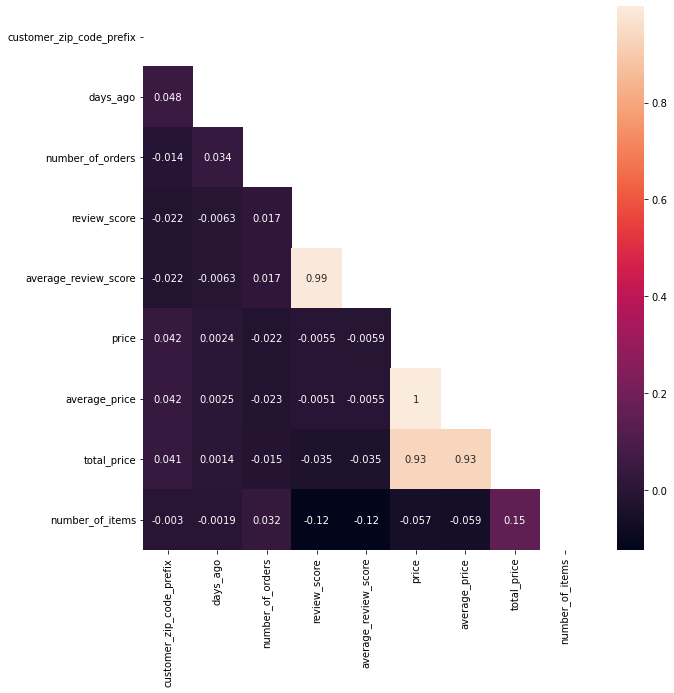

In [79]:
list_cat = [i for i in df.columns if 'Cat_' in i]  #Get list of columns corresponding to a category
list_non_cat = [i for i in df.columns if i not in list_cat] #Columns that are not a category

plt.figure(figsize=(10, 10))
corr = df[list_non_cat].corr() 
mask = np.triu(corr)
sns.heatmap(corr, mask=mask, annot=True)

In [80]:
df = df.drop(['price', 'total_price', 'review_score'], axis=1)

<AxesSubplot:>

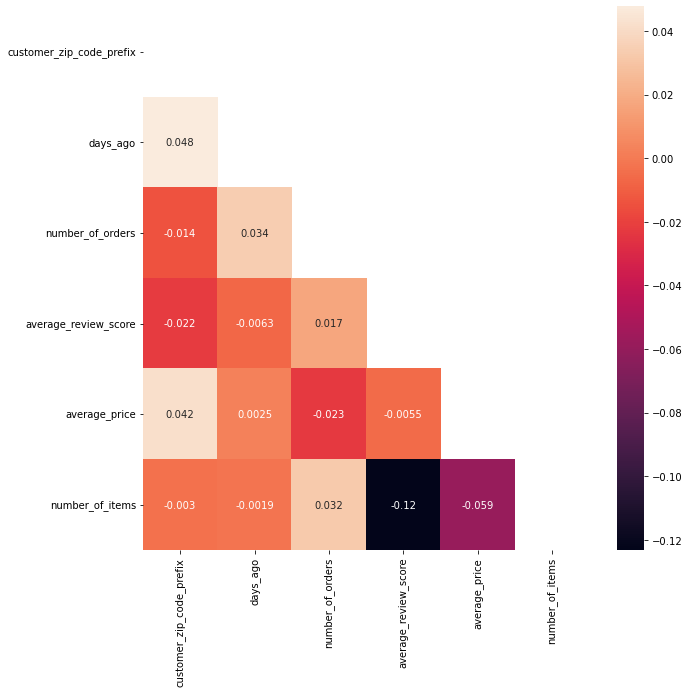

In [81]:
list_non_cat.remove('price')
list_non_cat.remove('total_price')
list_non_cat.remove('review_score')

plt.figure(figsize=(10, 10))
corr = df[list_non_cat].corr() 
mask = np.triu(corr)
sns.heatmap(corr, mask=mask, annot=True)

### Potential outliers in the product prices (>3000)

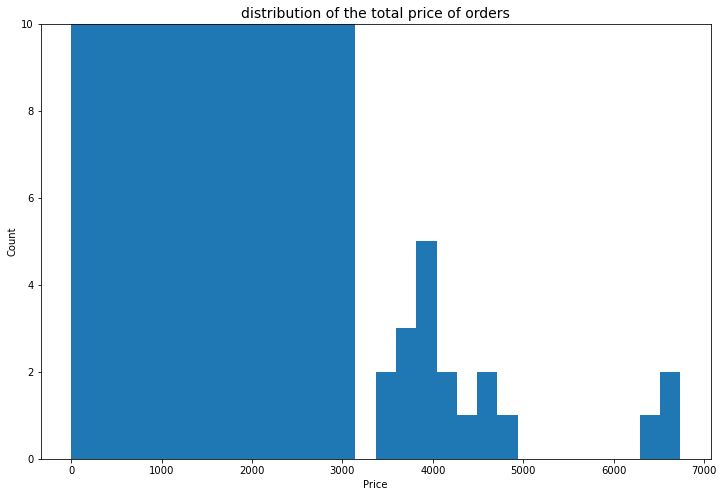

In [82]:
fig = plt.figure(figsize=(12, 8))
plt.hist(df['average_price'], 30)

plt.title('distribution of the total price of orders', fontsize=14)
plt.xlabel('Price')
plt.ylabel('Count')
plt.ylim(0, 10)
plt.show()

In [83]:
display(df.loc[df['average_price']>=3000, list_non_cat])
indices_prices = df.loc[df['average_price']>=3000].index
print(indices_prices)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,days_ago,number_of_orders,average_review_score,product_category_name,average_price,number_of_items,main_payment_type
2841,e9b0d0eb3015ef1c9ce6cf5b9dcbee9f,ca27f3dac28fb1063faddd424c9d95fa,34018,nova lima,MG,b239ca7cd485940b31882363b52e6674,31,1,4.0,esporte_lazer,4059.00,1,debit_card
3683,3fd6777bbce08a352fddd04e4a7cc8f6,ff4159b92c40ebe40454e3e6a7c35ed6,17506,marilia,SP,f5136e38d1a14a4dbd87dff67da82701,462,1,5.0,Other,6499.00,1,boleto
3785,7e7d2271d6f55b03b0bd4615c5f2de6e,bbeb907759ef5fc169099af3c88d535d,89113,gaspar,SC,1d54db601b417ccdfd3b7071955e6cc7,124,1,5.0,ferramentas_jardim,3105.00,1,credit_card
7929,926b6a6fb8b6081e00b335edaf578d35,edf81e1f3070b9dac83ec83dacdbb9bc,72322,brasilia,DF,80dfedb6d17bf23539beeef3c768f4d7,498,1,2.0,eletroportateis,3999.00,1,credit_card
8739,a95f4bbcf95262b073e4afa481b59ff8,53fb3435773a4690e56010b169ee2820,35501,divinopolis,MG,31e50461be6957a749166e97af082d0a,201,1,5.0,Other,3099.90,1,boleto
12105,1afc82cd60e303ef09b4ef9837c9505c,edde2314c6c30e864a128ac95d6b2112,2995,sao paulo,SP,426a9742b533fc6fed17d1fd6d143d7e,26,1,5.0,instrumentos_musicais,4399.87,1,credit_card
20013,35a413c7ca3c69756cb75867d6311c0d,fa562ef24d41361e476e748681810e1e,35340,bom jesus do galho,MG,68101694e5c5dc7330c91e1bbc36214f,153,1,5.0,consoles_games,4099.99,1,credit_card
22698,c6e2731c5b391845f6800c97401a43a9,dc4802a71eae9be1dd28f5d788ceb526,79042,campo grande,MS,0812eb902a67711a1cb742b3cdaa65ae,563,1,5.0,utilidades_domesticas,6735.00,1,credit_card
23434,e7c905bf4bb13543e8df947af4f3d9e9,2c3b08cf3584d8c0a81d9618a73aa219,19023,presidente prudente,SP,3a4b013e014723cc38c9faa8ffdc6387,142,1,4.0,Other,3399.99,1,credit_card
28856,f48d464a0baaea338cb25f816991ab1f,459bef486812aa25204be022145caa62,29066,vitoria,ES,fefacc66af859508bf1a7934eab1e97f,35,1,NaN,Other,6729.00,1,boleto


Int64Index([ 2841,  3683,  3785,  7929,  8739, 12105, 20013, 22698, 23434,
            28856, 34323, 35416, 37922, 40687, 40700, 56852, 62568, 66142,
            67158, 69014, 72735, 79439, 83970, 86444, 95806],
           dtype='int64')


<AxesSubplot:title={'center':'average_price'}, xlabel='product_category_name'>

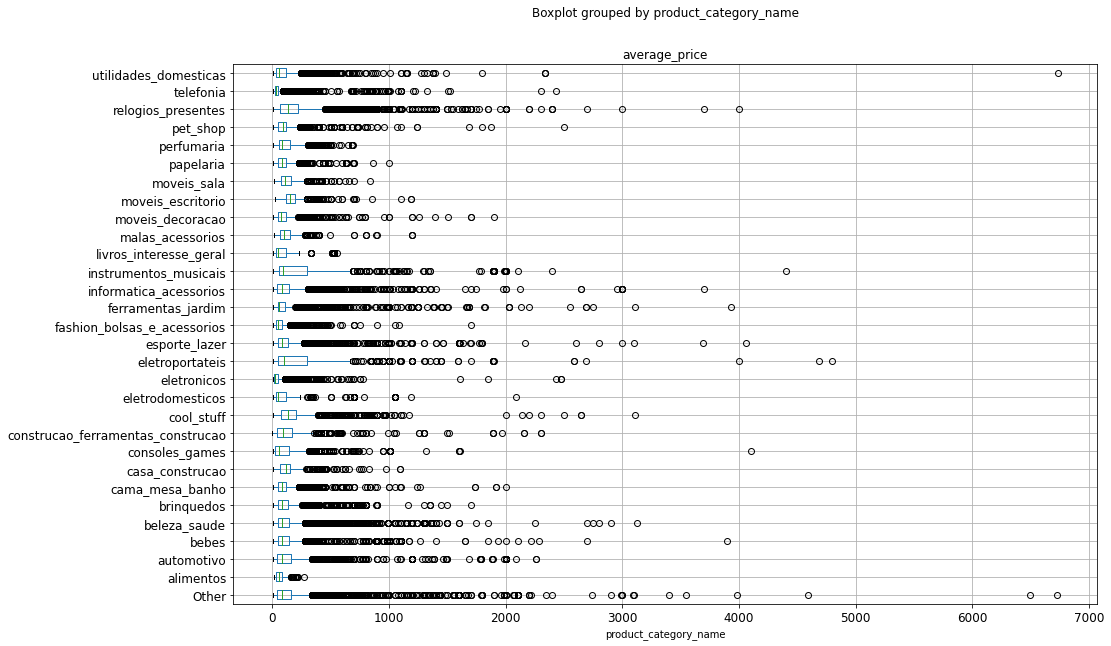

In [84]:
df.boxplot(column=['average_price'], by='product_category_name', figsize=(15, 10), fontsize=12, vert=False)

In [85]:
# ANOVA between product categories and product and product price,
# and between product categories product and number of items ordered

importlib.reload(utils)
print('eta2 category-price : ', utils.eta_squared_ANOVA(df['product_category_name'], df['average_price'].dropna()))
print('eta2 category-number of items : ', utils.eta_squared_ANOVA(df['product_category_name'], df['number_of_items'].dropna()))

# no 'correlation' between these features

eta2 category-price :  0.04
eta2 category-number of items :  0.02


In [86]:
# drop irrelevant fetaures
df = df.drop([
    'order_id',
    'customer_id',
    'customer_zip_code_prefix',
    'customer_city',
    'customer_state',
    'product_category_name',
    'main_payment_type'
], axis=1)

In [87]:
df.columns.tolist()

['customer_unique_id',
 'days_ago',
 'number_of_orders',
 'average_review_score',
 'average_price',
 'number_of_items',
 'Cat_Other',
 'Cat_alimentos',
 'Cat_automotivo',
 'Cat_bebes',
 'Cat_beleza_saude',
 'Cat_brinquedos',
 'Cat_cama_mesa_banho',
 'Cat_casa_construcao',
 'Cat_consoles_games',
 'Cat_construcao_ferramentas_construcao',
 'Cat_cool_stuff',
 'Cat_eletrodomesticos',
 'Cat_eletronicos',
 'Cat_eletroportateis',
 'Cat_esporte_lazer',
 'Cat_fashion_bolsas_e_acessorios',
 'Cat_ferramentas_jardim',
 'Cat_informatica_acessorios',
 'Cat_instrumentos_musicais',
 'Cat_livros_interesse_geral',
 'Cat_malas_acessorios',
 'Cat_moveis_decoracao',
 'Cat_moveis_escritorio',
 'Cat_moveis_sala',
 'Cat_papelaria',
 'Cat_perfumaria',
 'Cat_pet_shop',
 'Cat_relogios_presentes',
 'Cat_telefonia',
 'Cat_utilidades_domesticas']

In [88]:
df.to_csv(os.path.join(PATH, "df_by_order.csv"), index=False)

## Regroup by client

In [89]:
df = pd.read_csv(os.path.join(PATH, "df_by_order.csv"))

In [90]:
df

,customer_unique_id,days_ago,number_of_orders,average_review_score,average_price,number_of_items,Cat_Other,Cat_alimentos,Cat_automotivo,Cat_bebes,...,Cat_malas_acessorios,Cat_moveis_decoracao,Cat_moveis_escritorio,Cat_moveis_sala,Cat_papelaria,Cat_perfumaria,Cat_pet_shop,Cat_relogios_presentes,Cat_telefonia,Cat_utilidades_domesticas
0,7c396fd4830fd04220f754e42b4e5bff,331,2,4.5,29.99,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,7c396fd4830fd04220f754e42b4e5bff,359,2,4.5,35.39,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,af07308b275d755c9edb36a90c618231,36,1,4.0,118.70,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3a653a41f6f9fc3d2a113cf8398680e8,21,1,5.0,159.90,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,7c142cf63193a1473d2e66489a9ae977,284,1,5.0,45.00,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96473,6359f309b166b0196dbf7ad2ac62bb5a,538,1,5.0,72.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96474,da62f9e57a76d978d02ab5362c509660,204,1,4.0,174.90,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
96475,737520a9aad80b3fbbdad19b66b37b30,367,1,5.0,205.99,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96476,5097a5312c8b157bb7be58ae360ef43c,233,1,2.0,179.99,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
df.isnull().sum()

customer_unique_id                         0
days_ago                                   0
number_of_orders                           0
average_review_score                     612
average_price                              0
number_of_items                            0
Cat_Other                                  0
Cat_alimentos                              0
Cat_automotivo                             0
Cat_bebes                                  0
Cat_beleza_saude                           0
Cat_brinquedos                             0
Cat_cama_mesa_banho                        0
Cat_casa_construcao                        0
Cat_consoles_games                         0
Cat_construcao_ferramentas_construcao      0
Cat_cool_stuff                             0
Cat_eletrodomesticos                       0
Cat_eletronicos                            0
Cat_eletroportateis                        0
Cat_esporte_lazer                          0
Cat_fashion_bolsas_e_acessorios            0
Cat_ferram

In [92]:
list_to_min = ['days_ago'] # take the most recent order
list_to_average = ['average_review_score', 'average_price', 'number_of_items'] # features where we take the average between all orders
list_to_leave = ['customer_unique_id', 'number_of_orders'] # features to leave untouched


list_to_sum = [i for i in df.columns.tolist() if i not in list_to_min  # features where we sum the values
               and i not in list_to_average 
               and i not in list_to_leave]

In [93]:
list_to_sum

['Cat_Other',
 'Cat_alimentos',
 'Cat_automotivo',
 'Cat_bebes',
 'Cat_beleza_saude',
 'Cat_brinquedos',
 'Cat_cama_mesa_banho',
 'Cat_casa_construcao',
 'Cat_consoles_games',
 'Cat_construcao_ferramentas_construcao',
 'Cat_cool_stuff',
 'Cat_eletrodomesticos',
 'Cat_eletronicos',
 'Cat_eletroportateis',
 'Cat_esporte_lazer',
 'Cat_fashion_bolsas_e_acessorios',
 'Cat_ferramentas_jardim',
 'Cat_informatica_acessorios',
 'Cat_instrumentos_musicais',
 'Cat_livros_interesse_geral',
 'Cat_malas_acessorios',
 'Cat_moveis_decoracao',
 'Cat_moveis_escritorio',
 'Cat_moveis_sala',
 'Cat_papelaria',
 'Cat_perfumaria',
 'Cat_pet_shop',
 'Cat_relogios_presentes',
 'Cat_telefonia',
 'Cat_utilidades_domesticas']

In [94]:
importlib.reload(utils)
for i in list_to_min:
    df = utils.groupby_agg(df, 'customer_unique_id', i, 'min')

for i in list_to_average:
    df = utils.groupby_agg(df, 'customer_unique_id', i, 'mean')

for i in list_to_sum:
    df = utils.groupby_agg(df, 'customer_unique_id', i, 'sum')

In [95]:
df

,customer_unique_id,number_of_orders,days_ago,average_review_score,average_price,number_of_items,Cat_Other,Cat_alimentos,Cat_automotivo,Cat_bebes,...,Cat_malas_acessorios,Cat_moveis_decoracao,Cat_moveis_escritorio,Cat_moveis_sala,Cat_papelaria,Cat_perfumaria,Cat_pet_shop,Cat_relogios_presentes,Cat_telefonia,Cat_utilidades_domesticas
0,7c396fd4830fd04220f754e42b4e5bff,2,331,4.5,32.69,1.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,7c396fd4830fd04220f754e42b4e5bff,2,331,4.5,32.69,1.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,af07308b275d755c9edb36a90c618231,1,36,4.0,118.70,1.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3a653a41f6f9fc3d2a113cf8398680e8,1,21,5.0,159.90,1.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,7c142cf63193a1473d2e66489a9ae977,1,284,5.0,45.00,1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96473,6359f309b166b0196dbf7ad2ac62bb5a,1,538,5.0,72.00,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96474,da62f9e57a76d978d02ab5362c509660,1,204,4.0,174.90,1.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
96475,737520a9aad80b3fbbdad19b66b37b30,1,367,5.0,205.99,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96476,5097a5312c8b157bb7be58ae360ef43c,1,233,2.0,179.99,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### We now have identical rows for customers who ordered several times, we can drop the duplicates to have 1 row per customer

In [96]:
df = df.drop_duplicates(subset=['customer_unique_id'], keep='first')

In [97]:
df = df.drop('customer_unique_id', axis=1) # Since we have 1 line per customer, the customer_unique_id is not relevant anymore

In [98]:
df = df.rename(columns={'days_ago':'days_since_most_recent_order'})

In [99]:
df.to_csv(os.path.join(PATH, "df_by_client.csv"), index=False)